# Chatbot
- [reference] https://python.langchain.com/v0.2/docs/tutorials/chatbot/

## Quickstart

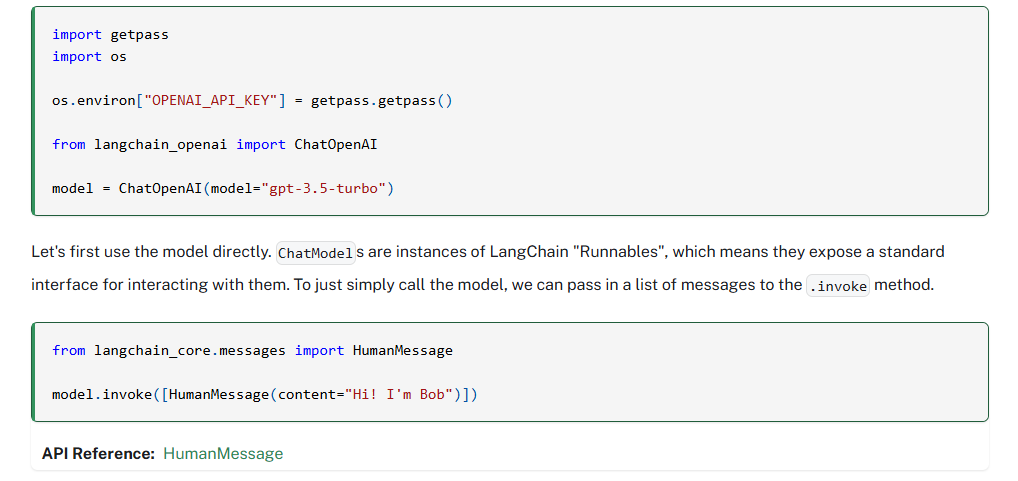

In [1]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage
from dotenv import load_dotenv


In [2]:
load_dotenv()


True

In [52]:
model = ChatOpenAI(model='gpt-4.1-nano')
model 


ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x000001B25718B880>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x000001B257FF1C60>, root_client=<openai.OpenAI object at 0x000001B2571A3610>, root_async_client=<openai.AsyncOpenAI object at 0x000001B25718B910>, model_name='gpt-4.1-nano', model_kwargs={}, openai_api_key=SecretStr('**********'))

In [4]:
ai_message = model.invoke([HumanMessage(content="Hi! I'm Bob")])

In [5]:
ai_message.content

'Hello, Bob! How can I assist you today?'

In [6]:
ai_message_02 = model.invoke('What is my name?')
ai_message_02

AIMessage(content="I'm sorry, I don't have the ability to know your name. You can tell me your name if you'd like!", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 12, 'total_tokens': 38, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BcMllpOGnHvVY0H77PWJ37Nz9eIXk', 'finish_reason': 'stop', 'logprobs': None}, id='run-cbea91d8-7d65-4cfd-96c0-104482abc0f0-0', usage_metadata={'input_tokens': 12, 'output_tokens': 26, 'total_tokens': 38, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [7]:
ai_message_03 = model.invoke([HumanMessage('What is my name?')])
ai_message_03

AIMessage(content="I'm sorry, but I do not have the ability to know your name. Can you please provide me with your name?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 12, 'total_tokens': 37, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BcMlmEoCTHryyVnMyZ4b0qMlkpgbQ', 'finish_reason': 'stop', 'logprobs': None}, id='run-b50fe96f-8428-4645-abf3-ec799140bae6-0', usage_metadata={'input_tokens': 12, 'output_tokens': 25, 'total_tokens': 37, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [8]:
from langchain_core.messages import AIMessage
ai_message_04 = model.invoke(
    [
    HumanMessage(content='Hi I am Bob'),
    AIMessage(content='hellow Bob! How can I assist you today?'),
    HumanMessage(content='What is my name?')
    ]
) 
ai_message_04.content

'Your name is Bob.'

## Message History

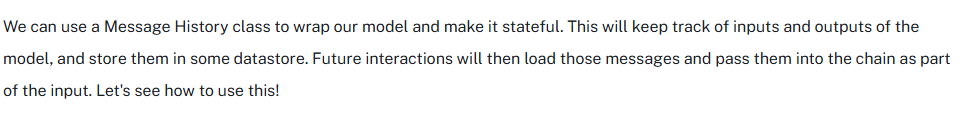

In [9]:
from langchain_core.chat_history import(
    BaseChatMessageHistory,
    InMemoryChatMessageHistory,
)
from langchain_core.runnables.history import RunnableWithMessageHistory

store = {}

def get_session_history(session_id:str) -> BaseChatMessageHistory:
    if session_id not in store:
        store[session_id] = InMemoryChatMessageHistory()
    return store[session_id]

with_message_history = RunnableWithMessageHistory(model,get_session_history)

In [10]:
config = {'configurable': {'session_id': 'abc'}}

response = with_message_history.invoke(
    [HumanMessage(content='Hi! I am Bob')],
    config=config
)

response.content

'Hello Bob! How can I assist you today?'

In [11]:
response = with_message_history.invoke(
    [HumanMessage(content='What is my name?')],
    config=config
)

response.content


'Your name is Bob.'

### [문제] 대화 이력(message history)에서 첫 번째 질문(Human Message) 출력

In [12]:
## 대화 이력
get_session_history('abc')

InMemoryChatMessageHistory(messages=[HumanMessage(content='Hi! I am Bob', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello Bob! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 12, 'total_tokens': 22, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BcMln8WwySgd0aE6bujyyU9IFW0Jq', 'finish_reason': 'stop', 'logprobs': None}, id='run-c42897b4-643c-4049-ae75-57d89ab9b229-0', usage_metadata={'input_tokens': 12, 'output_tokens': 10, 'total_tokens': 22, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), HumanMessage(content='What is my name?', additional_kwargs={}, response_metadata={}),

In [13]:
get_session_history('abc').messages

[HumanMessage(content='Hi! I am Bob', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Hello Bob! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 12, 'total_tokens': 22, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BcMln8WwySgd0aE6bujyyU9IFW0Jq', 'finish_reason': 'stop', 'logprobs': None}, id='run-c42897b4-643c-4049-ae75-57d89ab9b229-0', usage_metadata={'input_tokens': 12, 'output_tokens': 10, 'total_tokens': 22, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),
 HumanMessage(content='What is my name?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Your name is 

In [14]:
type(get_session_history('abc').messages)

list

In [15]:
get_session_history('abc').messages[0]

HumanMessage(content='Hi! I am Bob', additional_kwargs={}, response_metadata={})

In [16]:
get_session_history('abc').messages[0].content

'Hi! I am Bob'

In [17]:
config = {'configurable': {'session_id': 'abc2'}}

response = with_message_history.invoke(
    [HumanMessage(content='What is my name?')],
    config=config
)

response.content

"I'm sorry, I do not have the ability to know your name as an AI assistant."

In [18]:
len(store)

2

In [19]:
store.keys()

dict_keys(['abc', 'abc2'])

In [20]:
get_session_history('abc2')

InMemoryChatMessageHistory(messages=[HumanMessage(content='What is my name?', additional_kwargs={}, response_metadata={}), AIMessage(content="I'm sorry, I do not have the ability to know your name as an AI assistant.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 12, 'total_tokens': 31, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BcMlpq94qWOBvrXvhr7jNg4aZuHkh', 'finish_reason': 'stop', 'logprobs': None}, id='run-e0e9e791-d7f8-4b72-8b5d-7a5e353b9f47-0', usage_metadata={'input_tokens': 12, 'output_tokens': 19, 'total_tokens': 31, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})])

In [21]:
for message in get_session_history('abc2').messages:
    print(message.content)

What is my name?
I'm sorry, I do not have the ability to know your name as an AI assistant.


In [22]:
config = {'configurable': {'session_id': 'abc'}}

response = with_message_history.invoke(
    [HumanMessage(content='What is my name?')],
    config=config
)

response.content

'Your name is Bob. Is there anything else I can help with?'

In [23]:
for message in get_session_history('abc').messages:
    print(message.content)

Hi! I am Bob
Hello Bob! How can I assist you today?
What is my name?
Your name is Bob.
What is my name?
Your name is Bob. Is there anything else I can help with?


## Prompt templates

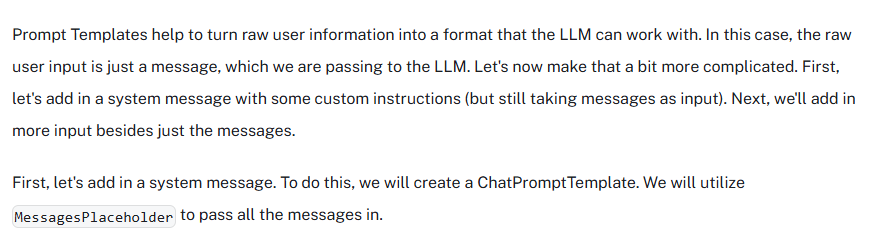

In [24]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

prompt = ChatPromptTemplate.from_messages(
    [
        ('system','You are a helpful assistant. Answer all questions to the best of your ability.'),
         MessagesPlaceholder(variable_name='messages'),
    ]
)

chain = prompt | model

In [25]:
response = chain.invoke({"messages": [HumanMessage(content="hi! I'm Bob")]})

response.content

'Hello Bob! How can I assist you today?'

In [26]:
len(store)

2

In [27]:
with_message_history = RunnableWithMessageHistory(chain, get_session_history)

config = {'configurable': {'session_id':'abc3'}}

response = with_message_history.invoke(
    [HumanMessage(content='Hi! I am Jim')],
    config=config
)

response.content

'Hello, Jim! How can I assist you today?'

In [28]:
len(store)

3

In [29]:
store.keys()

dict_keys(['abc', 'abc2', 'abc3'])

In [30]:
get_session_history('abc3').messages

[HumanMessage(content='Hi! I am Jim', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Hello, Jim! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 32, 'total_tokens': 43, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BcMlrQzGbj8PtK8bjRe7DsaQ5Da6Y', 'finish_reason': 'stop', 'logprobs': None}, id='run-90605dde-30ca-4914-b8df-7363936a822e-0', usage_metadata={'input_tokens': 32, 'output_tokens': 11, 'total_tokens': 43, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]

In [31]:
for message in get_session_history('abc3').messages:
    print(message.content)

Hi! I am Jim
Hello, Jim! How can I assist you today?


In [32]:
store['abc3']

InMemoryChatMessageHistory(messages=[HumanMessage(content='Hi! I am Jim', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello, Jim! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 32, 'total_tokens': 43, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BcMlrQzGbj8PtK8bjRe7DsaQ5Da6Y', 'finish_reason': 'stop', 'logprobs': None}, id='run-90605dde-30ca-4914-b8df-7363936a822e-0', usage_metadata={'input_tokens': 32, 'output_tokens': 11, 'total_tokens': 43, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})])

In [33]:
response = with_message_history.invoke(
    [HumanMessage(content='What is my name?')],
    config=config
)

response.content

'Your name is Jim.'

In [34]:
get_session_history('abc3')

InMemoryChatMessageHistory(messages=[HumanMessage(content='Hi! I am Jim', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello, Jim! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 32, 'total_tokens': 43, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BcMlrQzGbj8PtK8bjRe7DsaQ5Da6Y', 'finish_reason': 'stop', 'logprobs': None}, id='run-90605dde-30ca-4914-b8df-7363936a822e-0', usage_metadata={'input_tokens': 32, 'output_tokens': 11, 'total_tokens': 43, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), HumanMessage(content='What is my name?', additional_kwargs={}, response_metadata={})

In [35]:
for message in get_session_history('abc3').messages:
    print(f'[{message.type.upper()}]:{message.content}')

[HUMAN]:Hi! I am Jim
[AI]:Hello, Jim! How can I assist you today?
[HUMAN]:What is my name?
[AI]:Your name is Jim.


In [36]:
get_session_history('abc3').messages

[HumanMessage(content='Hi! I am Jim', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Hello, Jim! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 32, 'total_tokens': 43, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BcMlrQzGbj8PtK8bjRe7DsaQ5Da6Y', 'finish_reason': 'stop', 'logprobs': None}, id='run-90605dde-30ca-4914-b8df-7363936a822e-0', usage_metadata={'input_tokens': 32, 'output_tokens': 11, 'total_tokens': 43, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),
 HumanMessage(content='What is my name?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Your name is

In [37]:
get_session_history('abc3').messages[0]

HumanMessage(content='Hi! I am Jim', additional_kwargs={}, response_metadata={})

In [38]:
get_session_history('abc3').messages[0].type

'human'

In [39]:
get_session_history('abc3').messages[0].type.upper()

'HUMAN'

In [40]:
prompt = ChatPromptTemplate.from_messages(
    [
        ('system', 'You are helpful assistant. Answer all question to the best of your ability in {language}.',),
        MessagesPlaceholder(variable_name='messages') 
    ])

chain = prompt | model

- Let's now wrap this more complicated chain in a Message History class. 
- This time, because there are multiple keys in the input, we need to specify the correct key to use to save the chat history.

In [41]:
response = chain.invoke(
    {"messages": [HumanMessage(content="hi! I'm bob")], "language": "Spanish"}
)

response.content

'¡Hola, Bob! ¿En qué puedo ayudarte hoy?'

In [49]:
with_message_history = RunnableWithMessageHistory(
    chain,
    get_session_history,
    input_messages_key='messages',
)

config = {'configurable': {'session_id': 'abc4'}}

response = with_message_history.invoke(
    {'messages': [HumanMessage(content='Hi! I am Todd')], 'language': 'Spanish'},
    config=config,
)

response.content

'¡Hola, Todd! ¿En qué puedo ayudarte hoy?'

In [43]:
len(store)

4

In [44]:
get_session_history('abc4')

InMemoryChatMessageHistory(messages=[HumanMessage(content='Hi! I am Todd', additional_kwargs={}, response_metadata={}), AIMessage(content='¡Hola, Todd! ¿En qué puedo ayudarte hoy?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 33, 'total_tokens': 46, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BcMltvF6j72btuxU6PsNpvlt16iDo', 'finish_reason': 'stop', 'logprobs': None}, id='run-52505073-4d1a-49c9-a747-7901fdeda953-0', usage_metadata={'input_tokens': 33, 'output_tokens': 13, 'total_tokens': 46, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})])

In [45]:
response = with_message_history.invoke(
    {'messages': [HumanMessage(content='Whats my name?')], 'language': 'Spanish'},
    config=config,
)

response.content

'Tu nombre es Todd.'

In [46]:
get_session_history('abc4').messages

[HumanMessage(content='Hi! I am Todd', additional_kwargs={}, response_metadata={}),
 AIMessage(content='¡Hola, Todd! ¿En qué puedo ayudarte hoy?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 33, 'total_tokens': 46, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BcMltvF6j72btuxU6PsNpvlt16iDo', 'finish_reason': 'stop', 'logprobs': None}, id='run-52505073-4d1a-49c9-a747-7901fdeda953-0', usage_metadata={'input_tokens': 33, 'output_tokens': 13, 'total_tokens': 46, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),
 HumanMessage(content='Whats my name?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Tu nombre es

## Managing Conversation History

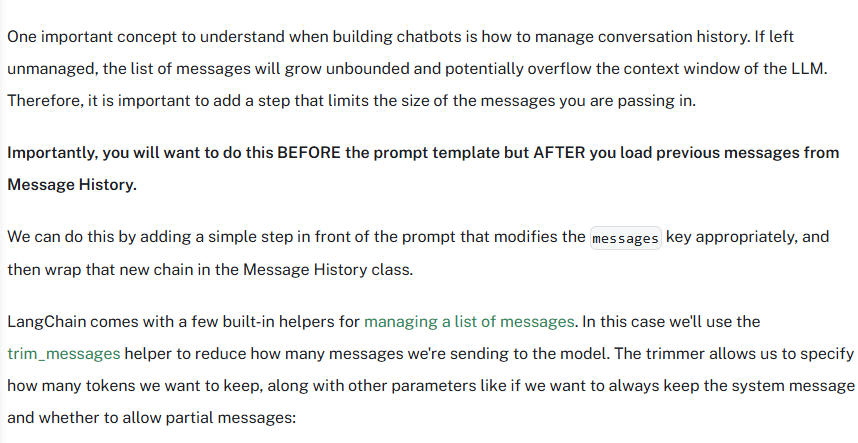

In [53]:
from langchain_core.messages import SystemMessage, trim_messages

model=ChatOpenAI(model='gpt-4o')

trimmer = trim_messages(
    max_tokens=65,
    strategy="last",
    token_counter=model,
    include_system=True,
    allow_partial=False,
    start_on="human",
)

messages = [
    SystemMessage(content='You are a good assistant'),
    HumanMessage(content='Hi! I am Bob'),
    AIMessage(content='Hi!'),
    HumanMessage(content='I like vanilla ice cream'),
    AIMessage(content='nice'),
    HumanMessage(content='Whats 2 + 2'),
    AIMessage(content='4'),
    HumanMessage(content='Thanks'),
    AIMessage(content='No problem!'),
    HumanMessage(content='Having fun?'),
    AIMessage(content='Yes!'),
]

trimmer.invoke(messages)

[SystemMessage(content='You are a good assistant', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Whats 2 + 2', additional_kwargs={}, response_metadata={}),
 AIMessage(content='4', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Thanks', additional_kwargs={}, response_metadata={}),
 AIMessage(content='No problem!', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Having fun?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Yes!', additional_kwargs={}, response_metadata={})]

In [59]:
from langchain_core.messages import SystemMessage, trim_messages

model=ChatOpenAI(model='gpt-4o')

trimmer = trim_messages(
    max_tokens=65,
    strategy="first",
    token_counter=model,
    # include_system=True,
    allow_partial=False,
    # start_on="human",
)

messages = [
    SystemMessage(content='You are a good assistant'),
    HumanMessage(content='Hi! I am Bob'),
    AIMessage(content='Hi!'),
    HumanMessage(content='I like vanilla ice cream'),
    AIMessage(content='nice'),
    HumanMessage(content='Whats 2 + 2'),
    AIMessage(content='4'),
    HumanMessage(content='Thanks'),
    AIMessage(content='No problem!'),
    HumanMessage(content='Having fun?'),
    AIMessage(content='Yes!'),
]

trimmer.invoke(messages)

[SystemMessage(content='You are a good assistant', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Hi! I am Bob', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Hi!', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='I like vanilla ice cream', additional_kwargs={}, response_metadata={}),
 AIMessage(content='nice', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Whats 2 + 2', additional_kwargs={}, response_metadata={}),
 AIMessage(content='4', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Thanks', additional_kwargs={}, response_metadata={})]

In [64]:
from langchain_core.messages import SystemMessage, trim_messages

model=ChatOpenAI(model='gpt-4o')

trimmer = trim_messages(
    max_tokens=65,
    strategy="last",
    token_counter=model,
    include_system=True,
    allow_partial=False,
    # start_on="human",
)

messages = [
    SystemMessage(content='You are a good assistant'),
    HumanMessage(content='Hi! I am Bob'),
    AIMessage(content='Hi!'),
    HumanMessage(content='I like vanilla ice cream'),
    AIMessage(content='nice'),
    HumanMessage(content='Whats 2 + 2'),
    AIMessage(content='4'),
    HumanMessage(content='Thanks'),
    AIMessage(content='No problem!'),
    HumanMessage(content='Having fun?'),
    AIMessage(content='Yes!'),
]

trimmer.invoke(messages)

[SystemMessage(content='You are a good assistant', additional_kwargs={}, response_metadata={}),
 AIMessage(content='nice', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Whats 2 + 2', additional_kwargs={}, response_metadata={}),
 AIMessage(content='4', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Thanks', additional_kwargs={}, response_metadata={}),
 AIMessage(content='No problem!', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Having fun?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Yes!', additional_kwargs={}, response_metadata={})]

In [ ]:
from langchain_core.messages import SystemMessage, trim_messages

model=ChatOpenAI(model='gpt-4o')

trimmer = trim_messages(
    max_tokens=65,
    strategy="last",
    token_counter=model,
    include_system=True,
    allow_partial=True,
    start_on="human",
)

messages = [
    SystemMessage(content='You are a good assistant'),
    HumanMessage(content='Hi! I am Bob'),
    AIMessage(content='Hi!'),
    HumanMessage(content='I like vanilla ice cream'),
    AIMessage(content='nice'),
    HumanMessage(content='Whats 2 + 2'),
    AIMessage(content='4'),
    HumanMessage(content='Thanks'),
    AIMessage(content='No problem!'),
    HumanMessage(content='Having fun?'),
    AIMessage(content='Yes!'),
]

trimmer.invoke(messages)

[SystemMessage(content='You are a good assistant', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Thanks', additional_kwargs={}, response_metadata={}),
 AIMessage(content='No problem!', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Having fun?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Yes!', additional_kwargs={}, response_metadata={})]

In [107]:
from langchain_core.messages import SystemMessage, trim_messages

model=ChatOpenAI(model='gpt-4o')

trimmer = trim_messages(
    max_tokens=65,
    strategy="last",
    token_counter=model,
    include_system=True,
    allow_partial=False,
    start_on="human",
)

messages = [
    SystemMessage(content='You are a good assistant'),
    HumanMessage(content='Hi! I am Bob'),
    AIMessage(content='Hi!'),
    HumanMessage(content='I like vanilla ice cream'),
    AIMessage(content='nice'),
    HumanMessage(content='Whats 2 + 2'),
    AIMessage(content='4'),
    HumanMessage(content='Thanks'),
    AIMessage(content='No problem!'),
    HumanMessage(content='Having fun?'),
    AIMessage(content='Yes!'),
]

trim_messages = trimmer.invoke(messages)
trim_messages

[SystemMessage(content='You are a good assistant', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Whats 2 + 2', additional_kwargs={}, response_metadata={}),
 AIMessage(content='4', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Thanks', additional_kwargs={}, response_metadata={}),
 AIMessage(content='No problem!', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Having fun?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Yes!', additional_kwargs={}, response_metadata={})]

In [84]:
model.get_num_tokens_from_messages(trim_messages)


52

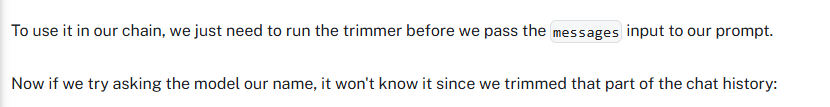

In [112]:
from operator import itemgetter

dc = {"messages": messages + [HumanMessage(content="what's my name?")],"language": "English"}

# result = itemgetter('messages')
# result(dc)

itemgetter('messages')(dc)

[SystemMessage(content='You are a good assistant', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Hi! I am Bob', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Hi!', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='I like vanilla ice cream', additional_kwargs={}, response_metadata={}),
 AIMessage(content='nice', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Whats 2 + 2', additional_kwargs={}, response_metadata={}),
 AIMessage(content='4', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Thanks', additional_kwargs={}, response_metadata={}),
 AIMessage(content='No problem!', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Having fun?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Yes!', additional_kwargs={}, response_metadata={}),
 HumanMessage(content="what's my name?", additional_kwargs={}, response_metadata={})]

In [114]:
from operator import itemgetter
from langchain_core.runnables import RunnablePassthrough

chain = (RunnablePassthrough.assign(messages=itemgetter("messages") | trimmer)
    | prompt
    | model
)

response = chain.invoke(
    {
        "messages": messages + [HumanMessage(content="what's my name?")],
        "language": "한국어",
    }
)
response.content

'죄송하지만, 대화 내에서 사용자가 이름을 말씀해 주지 않으셔서 현재로서는 알 수 없습니다. 이름을 알려주시면 기억할 수는 없습니다. 어떤 도움이 더 필요하신지 말씀해 주세요!'

In [115]:
response

AIMessage(content='죄송하지만, 대화 내에서 사용자가 이름을 말씀해 주지 않으셔서 현재로서는 알 수 없습니다. 이름을 알려주시면 기억할 수는 없습니다. 어떤 도움이 더 필요하신지 말씀해 주세요!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 49, 'prompt_tokens': 83, 'total_tokens': 132, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_76544d79cb', 'id': 'chatcmpl-BcQVbNKYDhZBGELW7NLmjZ95djtm1', 'finish_reason': 'stop', 'logprobs': None}, id='run-96a88694-461f-4617-82e2-e04c37f50902-0', usage_metadata={'input_tokens': 83, 'output_tokens': 49, 'total_tokens': 132, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [120]:
response.usage_metadata

{'input_tokens': 83,
 'output_tokens': 49,
 'total_tokens': 132,
 'input_token_details': {'audio': 0, 'cache_read': 0},
 'output_token_details': {'audio': 0, 'reasoning': 0}}

In [123]:
response.usage_metadata['total_tokens']

132

In [108]:
current_message = messages + [HumanMessage(content="what's my name?")]
trimmer.invoke(current_message)

[SystemMessage(content='You are a good assistant', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Whats 2 + 2', additional_kwargs={}, response_metadata={}),
 AIMessage(content='4', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Thanks', additional_kwargs={}, response_metadata={}),
 AIMessage(content='No problem!', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Having fun?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Yes!', additional_kwargs={}, response_metadata={}),
 HumanMessage(content="what's my name?", additional_kwargs={}, response_metadata={})]

In [ ]:
response = chain.invoke(
    {'messages': messages + [HumanMessage(content='What math problem did i ask')],
    'language': '한국어',}
)

response.content

'당신은 "2 + 2"라는 수학 문제를 물어보셨습니다.'

In [137]:
get_session_history('abc5')

InMemoryChatMessageHistory(messages=[])

In [ ]:
with_message_history = RunnableWithMessageHistory(
    chain,
    get_session_history,
    input_messages_key="messages",
)

config = {"configurable": {"session_id": "abc5"}}

response = with_message_history.invoke(
    {"messages": messages + [HumanMessage(content="whats my name?")],
    "language": "English",},
    config=config,
)

response.content

"I'm sorry, I don't know your name. You haven't shared it with me."

In [141]:
store.keys()

dict_keys(['abc', 'abc2', 'abc3', 'abc4', 'abc20', 'abc5', 'session_id', 'messases', 'store'])

In [142]:
get_session_history('abc5')

InMemoryChatMessageHistory(messages=[SystemMessage(content='You are a good assistant', additional_kwargs={}, response_metadata={}), HumanMessage(content='Hi! I am Bob', additional_kwargs={}, response_metadata={}), AIMessage(content='Hi!', additional_kwargs={}, response_metadata={}), HumanMessage(content='I like vanilla ice cream', additional_kwargs={}, response_metadata={}), AIMessage(content='nice', additional_kwargs={}, response_metadata={}), HumanMessage(content='Whats 2 + 2', additional_kwargs={}, response_metadata={}), AIMessage(content='4', additional_kwargs={}, response_metadata={}), HumanMessage(content='Thanks', additional_kwargs={}, response_metadata={}), AIMessage(content='No problem!', additional_kwargs={}, response_metadata={}), HumanMessage(content='Having fun?', additional_kwargs={}, response_metadata={}), AIMessage(content='Yes!', additional_kwargs={}, response_metadata={}), HumanMessage(content='whats my name?', additional_kwargs={}, response_metadata={}), AIMessage(co

In [144]:
for message in get_session_history('abc5').messages:
    print(f'[{message.type.upper()}]:{message.content}')

[SYSTEM]:You are a good assistant
[HUMAN]:Hi! I am Bob
[AI]:Hi!
[HUMAN]:I like vanilla ice cream
[AI]:nice
[HUMAN]:Whats 2 + 2
[AI]:4
[HUMAN]:Thanks
[AI]:No problem!
[HUMAN]:Having fun?
[AI]:Yes!
[HUMAN]:whats my name?
[AI]:I'm sorry, I don't know your name. You haven't shared it with me.


In [145]:
response = with_message_history.invoke(
    {'messages': [HumanMessage(content='What math problem did i ask?')],
    'language': '한국어',},
config=config,
)
response.content

'죄송하지만, 저에게 수학 문제를 요청하신 적은 없는 것 같습니다. 도움이 필요하시면 언제든지 말씀해 주세요!'

In [149]:
for message in get_session_history('abc5').messages:
    print(f'[{message.type.upper()}]:{message.content}')

[SYSTEM]:You are a good assistant
[HUMAN]:Hi! I am Bob
[AI]:Hi!
[HUMAN]:I like vanilla ice cream
[AI]:nice
[HUMAN]:Whats 2 + 2
[AI]:4
[HUMAN]:Thanks
[AI]:No problem!
[HUMAN]:Having fun?
[AI]:Yes!
[HUMAN]:whats my name?
[AI]:I'm sorry, I don't know your name. You haven't shared it with me.
[HUMAN]:What math problem did i ask?
[AI]:죄송하지만, 저에게 수학 문제를 요청하신 적은 없는 것 같습니다. 도움이 필요하시면 언제든지 말씀해 주세요!
